In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation


In [94]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)
data

# Drop the missing values
data = data.dropna()
print(data.head())

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)
print(train_input)
print(train_output)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)
print(test_input)
print(test_output)


      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
[[ 24.]
 [ 50.]
 [ 15.]
 [ 38.]
 [ 87.]
 [ 36.]
 [ 12.]
 [ 81.]
 [ 25.]
 [  5.]
 [ 16.]
 [ 16.]
 [ 24.]
 [ 39.]
 [ 54.]
 [ 60.]
 [ 26.]
 [ 73.]
 [ 29.]
 [ 31.]
 [ 68.]
 [ 87.]
 [ 58.]
 [ 54.]
 [ 84.]
 [ 58.]
 [ 49.]
 [ 20.]
 [ 90.]
 [ 48.]
 [  4.]
 [ 25.]
 [ 42.]
 [  0.]
 [ 60.]
 [ 93.]
 [ 39.]
 [  7.]
 [ 21.]
 [ 68.]
 [ 84.]
 [  0.]
 [ 58.]
 [ 19.]
 [ 36.]
 [ 19.]
 [ 59.]
 [ 51.]
 [ 19.]
 [ 33.]
 [ 85.]
 [ 44.]
 [  5.]
 [ 59.]
 [ 14.]
 [  9.]
 [ 75.]
 [ 69.]
 [ 10.]
 [ 17.]
 [ 58.]
 [ 74.]
 [ 21.]
 [ 51.]
 [ 19.]
 [ 50.]
 [ 24.]
 [  0.]
 [ 12.]
 [ 75.]
 [ 21.]
 [ 64.]
 [  5.]
 [ 58.]
 [ 32.]
 [ 41.]
 [  7.]
 [  4.]
 [  5.]
 [ 49.]
 [ 90.]
 [  3.]
 [ 11.]
 [ 32.]
 [ 83.]
 [ 25.]
 [ 83.]
 [ 26.]
 [ 76.]
 [ 95.]
 [ 53.]
 [ 77.]
 [ 42.]
 [ 25.]
 [ 54.]
 [ 55.]
 [  0.]
 [ 73.]
 [ 35.]
 [ 86.]
 [ 90.]
 [ 13.]
 [ 46.]
 [ 46.]
 [ 32.]
 [  8.]
 [ 71.]
 [ 28.]
 [ 24.]
 [ 56.]
 [ 49.

In [95]:
class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        # dm= 2/n * mean of (predictions-actual) * input 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        # dc = 2/n * mean of (predictions-actual) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        # Initialize random parameters 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1
        print(self.parameters['m'])
        print(self.parameters['c'])

        # Initialize loss 
        self.loss = [] 

        # Initialize figure and axis for animation 
        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', 
                color='green', label='Training Data') 

        # Set y-axis limits to exclude negative values 
        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            # Forward propagation 
            predictions = self.forward_propagation(train_input) 

            # Cost function 
            cost = self.cost_function(predictions, train_output) 

            # Back propagation 
            derivatives = self.backward_propagation( 
                train_input, train_output, predictions) 

            # Update parameters 
            self.update_parameters(derivatives, learning_rate) 

            # Update the regression line 
            line.set_ydata(self.parameters['m'] 
                        * x_vals + self.parameters['c']) 

            # Append loss and print 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 

            return line, 
        # Create animation 
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 

        # Save the animation as a video file (e.g., MP4) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss 


MovieWriter ffmpeg unavailable; using Pillow instead.


-0.4641342867580689
-0.6239033733440604
Iteration = 1, Loss = 7069.649869748842
Iteration = 1, Loss = 858.8775968152742
Iteration = 1, Loss = 110.41194519478364
Iteration = 1, Loss = 20.213685891214016
Iteration = 2, Loss = 9.343811065079212
Iteration = 3, Loss = 8.033869872940947
Iteration = 4, Loss = 7.876004721546666
Iteration = 5, Loss = 7.856977271019084
Iteration = 6, Loss = 7.854681274670413
Iteration = 7, Loss = 7.854401600933467
Iteration = 8, Loss = 7.8543649163145375
Iteration = 9, Loss = 7.854357514829006
Iteration = 10, Loss = 7.854353642580011
Iteration = 11, Loss = 7.854350195942675
Iteration = 12, Loss = 7.854346800896398
Iteration = 13, Loss = 7.854343412367593
Iteration = 14, Loss = 7.854340024924375
Iteration = 15, Loss = 7.854336637912109
Iteration = 16, Loss = 7.854333251251878
Iteration = 17, Loss = 7.85432986493414
Iteration = 18, Loss = 7.854326478957718
Iteration = 19, Loss = 7.854323093322433
Iteration = 20, Loss = 7.854319708028235


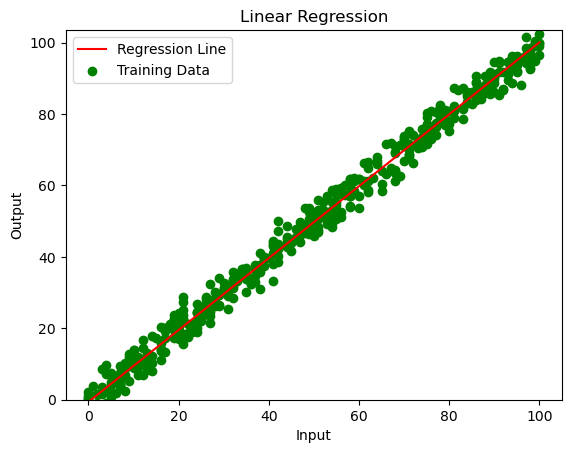

In [96]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)